# Heart Attack Analysis

In [1]:
!pip list

Package                   Version
------------------------- ---------
asttokens                 2.4.1
attrs                     23.2.0
backcall                  0.2.0
bleach                    6.1.0
certifi                   2024.2.2
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.1.4
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.0
decorator                 5.1.1
executing                 2.0.0
fastjsonschema            2.19.1
fonttools                 4.51.0
idna                      3.7
ipykernel                 6.26.0
ipython                   8.16.1
jedi                      0.19.1
joblib                    1.4.0
jsonschema                4.21.1
jsonschema-specifications 2023.12.1
jupyter_client            8.5.0
jupyter_core              5.4.0
kaggle                    1.6.12
kiwisolver                1.4.5
matplotlib                3.8.4
matplotlib-inline         0.1.6
nbformat            

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
heart_df = pd.read_csv('data/heart.csv')

In [4]:
heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

# Exploratory Data Analysis

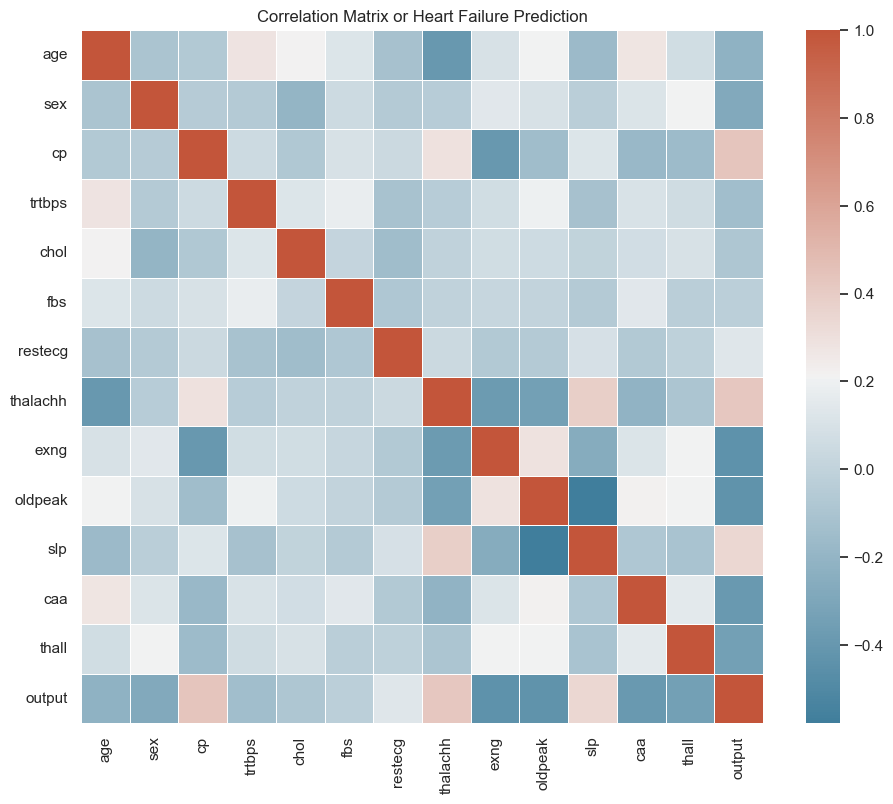

In [7]:
sns.set_theme(style="dark")

# Compute the correlation matrix
corr = heart_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, linewidths=0.5)
plt.title("Correlation Matrix or Heart Failure Prediction")
plt.show()

In [8]:
fig = px.histogram(heart_df, x='output', color='sex',
                 title="Distribution of Heart Diseases (1: Male, 0: Female)",
                 barmode="group")
fig.show()

In [1]:
fig = px.histogram(heart_df, x='cp', color='sex', title='Type of Chest Pain (1: Male, 0: Female)')
# Add spacing between columns
fig.update_layout(bargap=0.2)
# Update the x axis labels 
fig.update_xaxes(tickvals=[0, 1, 2, 3], 
                 ticktext=['Asymtomatic', 'Atypical Angina', 'Non-aginal Pain', 'Typical Angina']
)
fig.show()

NameError: name 'px' is not defined

In [10]:
fig = px.histogram(heart_df, x='sex', title='Sex Ratio in the Data')
# Add spacing between columns
fig.update_layout(bargap=0.2)
# Update the x axis labels
fig.update_xaxes(tickvals=[0, 1], 
                 ticktext=['Female', 'Male']
)
fig.show()

In [11]:
fig = px.histogram(heart_df, x='restecg', color='sex', title='Distribution of Resting ECG (1: Male, 0: Female)')
# Add spacing between columns
fig.update_layout(bargap=0.2)
# Update the x axis labels
fig.update_xaxes(tickvals=[0, 1, 2], 
                 ticktext=['Normal', 'ST-T Wave Abnormality', 'Left Ventricular Hypertropy']
)
fig.show()

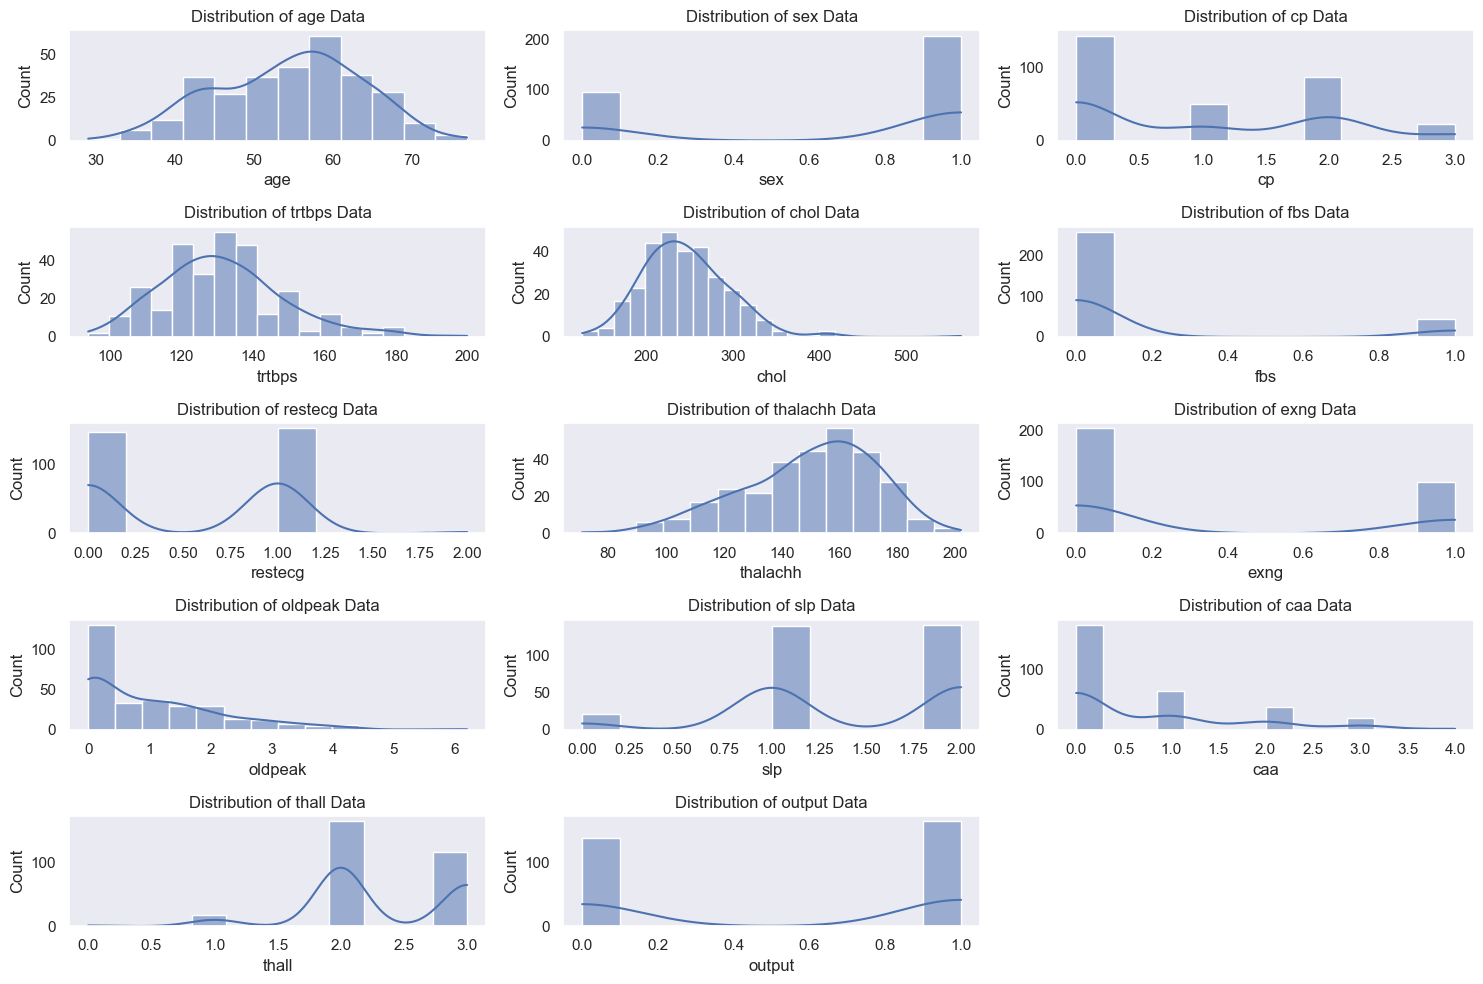

In [12]:
plt.figure(figsize=(15,10))
for i, col in enumerate(heart_df.columns, 1):
    plt.subplot(5, 3, i)
    plt.title(f'Distribution of {col} Data')
    sns.histplot(heart_df[col], kde=True)
    plt.tight_layout()
    plt.plot()

# Outliers

In [13]:
fig = px.box(heart_df, y='age', x='output', title='Distribution of Age')
fig.show()

In [14]:
fig = px.box(heart_df, x='output', y='trtbps', title='Distribution of Resting BP', color='sex')
fig.show()

In [15]:
fig = px.box(heart_df, x='output', y='chol', title='Distribution of Cholesterol')
fig.show()

In [16]:
fig = px.box(heart_df, x='output', y='oldpeak', title='Distribution of Oldpeak')
fig.show()

In [17]:
fig = px.box(heart_df, x='output', y='thalachh', title='Distribution of Max HR')
fig.show()

# Data Preprocessing
1. Null Values
2. One Hot Encoding
3. Feature Scaling
4. Categorical Variables

In [18]:
# 1. Null Values
heart_df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

If we had missing data we could use the SimpleImputer to impute the mean for missing values

In [19]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer = imputer.fit(data['col_with_missing_data'])
# data['col_with_missing_data'] = imputer.transform(data['col_with_missing_data'])

In [20]:
# 2. One Hot Encoding
ohe_caa = pd.get_dummies(heart_df['caa'], prefix='major_blood_vessels', dtype=int)
ohe_cp = pd.get_dummies(heart_df['cp'], prefix='chest_pain_type', dtype=int)
ohe_restecg = pd.get_dummies(heart_df['restecg'], prefix='resting_ecg', dtype=int)
# Add to the dataframe
heart_df = pd.concat([heart_df, ohe_caa, ohe_cp, ohe_restecg], axis=1)
# Remove original values
heart_df.drop(['caa', 'cp', 'restecg'], axis=1, inplace=True)
heart_df

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,thall,...,major_blood_vessels_2,major_blood_vessels_3,major_blood_vessels_4,chest_pain_type_0,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,resting_ecg_0,resting_ecg_1,resting_ecg_2
0,63,1,145,233,1,150,0,2.3,0,1,...,0,0,0,0,0,0,1,1,0,0
1,37,1,130,250,0,187,0,3.5,0,2,...,0,0,0,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,2,...,0,0,0,0,1,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,2,2,...,0,0,0,0,1,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,2,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,1,3,...,0,0,0,1,0,0,0,0,1,0
299,45,1,110,264,0,132,0,1.2,1,3,...,0,0,0,0,0,0,1,0,1,0
300,68,1,144,193,1,141,0,3.4,1,3,...,1,0,0,1,0,0,0,0,1,0
301,57,1,130,131,0,115,1,1.2,1,3,...,0,0,0,1,0,0,0,0,1,0


In [21]:
# Separate features and the target
y = pd.DataFrame(heart_df['output'])
X = heart_df.drop(['output'], axis=1)
# 3. Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
scaled_X

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,thall,...,major_blood_vessels_2,major_blood_vessels_3,major_blood_vessels_4,chest_pain_type_0,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,resting_ecg_0,resting_ecg_1,resting_ecg_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.603053,0.0,0.370968,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.885496,0.0,0.564516,0.0,0.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.770992,0.0,0.225806,1.0,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.816794,0.0,0.129032,1.0,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.702290,1.0,0.096774,1.0,0.666667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.433962,0.262557,0.0,0.396947,1.0,0.032258,0.5,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
299,0.333333,1.0,0.150943,0.315068,0.0,0.465649,0.0,0.193548,0.5,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
300,0.812500,1.0,0.471698,0.152968,1.0,0.534351,0.0,0.548387,0.5,1.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
301,0.583333,1.0,0.339623,0.011416,0.0,0.335878,1.0,0.193548,0.5,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Train and Evaluate the Model

In [33]:
from sklearn.neighbors import KNeighborsClassifier
# We use statified Kfold because our dataset is small and we want to prevent the ratio 
# of high chance to low chance from deviating too far from the true ratio
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

fold0, fold1, fold2, fold3, fold4 = {}, {}, {}, {}, {}
model_accuracy = {'fold0':fold0, 'fold1':fold1, 'fold2':fold2, 'fold3':fold3, 'fold4':fold4} 


neighboors = range(12, 60)
kf=StratifiedKFold(n_splits=5)
for fold, (train, val) in enumerate(kf.split(X=scaled_X, y=y)):
    # Get the training and validation data
    X_train = scaled_X.loc[train, scaled_X.columns]
    y_train = y.loc[train, y.columns]
    y_train = np.array(y_train).reshape(y_train.shape[:1])
    
    X_val = scaled_X.loc[val, scaled_X.columns]
    y_val = y.loc[val, y.columns]
    y_val = np.array(y_val).reshape(y_val.shape[:1])
    
    for neighboor in neighboors:
        #print(f'Neighboors: {neighboor}')
        best_acc = 0
        model = KNeighborsClassifier(n_neighbors=neighboor, weights='distance', p=1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        #print(f'Fold: {fold}')
        #print(f'Classification Report\n{classification_report(y_val, y_pred)}')
        
        accuracy = roc_auc_score(y_val, y_pred)
        if fold == 0:
            model_accuracy['fold0'][f'neighboor{neighboor}'] = accuracy
        if fold == 1:
            model_accuracy['fold1'][f'neighboor{neighboor}'] = accuracy
        if fold == 2:
            model_accuracy['fold2'][f'neighboor{neighboor}'] = accuracy
        if fold == 3:
            model_accuracy['fold3'][f'neighboor{neighboor}'] = accuracy
        if fold == 4:
            model_accuracy['fold4'][f'neighboor{neighboor}'] = accuracy
        print(f'Accuracy (Fold: {fold} Neighboors: {neighboor}): {accuracy}')
    

Accuracy (Fold: 0 Neighboors: 12): 0.8598484848484849
Accuracy (Fold: 0 Neighboors: 13): 0.8598484848484849
Accuracy (Fold: 0 Neighboors: 14): 0.8598484848484849
Accuracy (Fold: 0 Neighboors: 15): 0.875
Accuracy (Fold: 0 Neighboors: 16): 0.875
Accuracy (Fold: 0 Neighboors: 17): 0.875
Accuracy (Fold: 0 Neighboors: 18): 0.875
Accuracy (Fold: 0 Neighboors: 19): 0.8598484848484849
Accuracy (Fold: 0 Neighboors: 20): 0.875
Accuracy (Fold: 0 Neighboors: 21): 0.8598484848484849
Accuracy (Fold: 0 Neighboors: 22): 0.8598484848484849
Accuracy (Fold: 0 Neighboors: 23): 0.8598484848484849
Accuracy (Fold: 0 Neighboors: 24): 0.8598484848484849
Accuracy (Fold: 0 Neighboors: 25): 0.8598484848484849
Accuracy (Fold: 0 Neighboors: 26): 0.8598484848484849
Accuracy (Fold: 0 Neighboors: 27): 0.841991341991342
Accuracy (Fold: 0 Neighboors: 28): 0.841991341991342
Accuracy (Fold: 0 Neighboors: 29): 0.841991341991342
Accuracy (Fold: 0 Neighboors: 30): 0.841991341991342
Accuracy (Fold: 0 Neighboors: 31): 0.841991

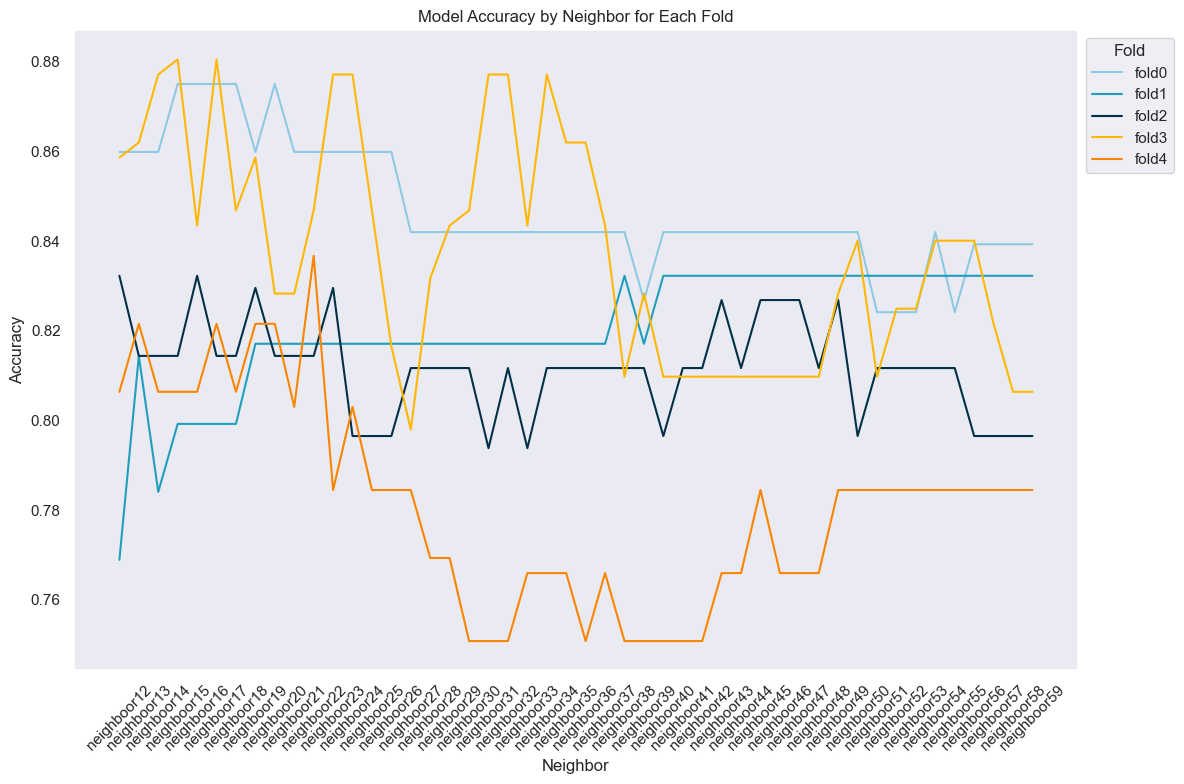

In [34]:
# Iterate through each fold and plot the data
colors = ['#8ecae6', '#219ebc', '#023047', '#ffb703', '#fb8500']
plt.figure(figsize=(12, 8))  # Set figure size
for fold, values in model_accuracy.items():
    plt.plot(list(values.keys()), list(values.values()), label=fold, color=colors[int(fold[-1])])  # Plot the data for the current fold

# Customize plot
plt.xlabel('Neighbor')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Neighbor for Each Fold')
plt.legend(title='Fold', bbox_to_anchor=(1, 1), loc='upper left')  # Move legend outside the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot